# Low Voltage Cables Reconstructor

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import pyproj
from shapely import Point
import matplotlib.pyplot as plt

/var/folders/bh/hhr2wkwn2ldcpz5w4tgn7sb80000gn/T/ipykernel_11527/1416953078.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


# 1. Analyse

Load data

In [2]:
CRS = 4326

laagspanningskabel = gpd.read_parquet('../../data/liander/laagspanningskabels_x_station.pyarrow')
laagspanningskabel = laagspanningskabel.to_crs(pyproj.CRS.from_epsg(CRS))
laagspanningskabel.head()

,id,geometry,station,kv
0,3337146,"LINESTRING (5.70785 51.95208, 5.70783 51.95208...",OS RENKUM,< 0.4
1,3337161,"LINESTRING (5.70684 51.95345, 5.70683 51.95343...",OS RENKUM,< 0.4
2,3337172,"LINESTRING (5.70719 51.95240, 5.70719 51.95240...",OS RENKUM,< 0.4
3,3337187,"LINESTRING (5.70743 51.95292, 5.70740 51.95293...",OS RENKUM,< 0.4
4,3337202,"LINESTRING (5.70761 51.95377, 5.70760 51.95377...",OS RENKUM,< 0.4


In [3]:
verzorgingsgebied = gpd.read_parquet('../../data/atom/verzorgingsgebied.parquet')
verzorgingsgebied = verzorgingsgebied.to_crs(pyproj.CRS.from_epsg(CRS))
verzorgingsgebied.head()

,id,station,netbeheerder,status,totaleCapaciteitInvoedingMva,totaleCapaciteitAfnameMva,beschikbareCapaciteitInvoedingHuidigMva,beschikbareCapaciteitAfnameHuidigMva,verwachtJaarVanOverbelastingInvoeding,verwachtJaarVanOverbelastingAfname,...,peildatum,beschikbareCapaciteitAfname3JaarMvaVisualisatie,beschikbareCapaciteitAfname5JaarMvaVisualisatie,beschikbareCapaciteitAfname10JaarMvaVisualisatie,beschikbareCapaciteitAfnameHuidigMvaVisualisatie,beschikbareCapaciteitInvoeding3JaarMvaVisualisatie,beschikbareCapaciteitInvoeding5JaarMvaVisualisatie,beschikbareCapaciteitInvoeding10JaarMvaVisualisatie,beschikbareCapaciteitInvoedingHuidigMvaVisualisatie,geometry
0,indicatief_verzorgingsgebied.3f7b1732-778d-4b1...,Wittevrouweveld,Enexis,Bestaand,35,35,34.0,10.0,2028,2035,...,2022-12-14,10,10,10,10,34,34,34,34,"MULTIPOLYGON (((5.66455 50.83226, 5.70274 50.8..."
1,indicatief_verzorgingsgebied.0a727e27-ba60-487...,Boschpoort,Enexis,Bestaand,45,45,6.0,23.0,2023,2035,...,2022-12-14,23,23,23,23,6,6,6,6,"MULTIPOLYGON (((5.64897 50.82704, 5.64918 50.8..."
2,indicatief_verzorgingsgebied.ed973a51-edcc-40e...,Heer,Enexis,Bestaand,40,40,38.0,0.0,2028,2023,...,2022-12-14,0,0,0,0,38,38,38,38,"MULTIPOLYGON (((5.83113 50.75886, 5.83102 50.7..."
3,indicatief_verzorgingsgebied.9e164099-7d30-41a...,Schoonbron,Enexis,Bestaand,45,47,0.0,0.0,2023,2023,...,2022-12-14,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((5.91508 50.75040, 5.91508 50.7..."
4,indicatief_verzorgingsgebied.adc9060f-a6b2-4dd...,Terwinselen,Enexis,Bestaand,110,116,0.0,0.0,2023,2023,...,2022-12-14,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((6.05465 50.92368, 6.05450 50.9..."


Target power station

In [4]:
station_name = 'OS UILENBURG'
df_lvc = laagspanningskabel[laagspanningskabel.station == station_name].copy()

Location Of Interest

The target represents a mock sample 'medium voltage installations' (middenspanningsinstallaties)

In [ ]:
# 6.48077 51.87102

In [ ]:
# 4.90395056796126 52.37134702204639

In [5]:
lat = 52.37134702204639
long = 4.90395056796126

# lat = 52.37420300092799
# long = 4.898515938086462

# lat = 52.373215068108266
# long = 4.899492327227819

buffer_size = .00004
target = Point(long, lat)
target = target.buffer(buffer_size)
target_gdp = gpd.GeoDataFrame({
    'target': [1],
}, geometry=[target], crs=laagspanningskabel.crs)

target_gdp = target_gdp.to_crs(pyproj.CRS.from_epsg(CRS))

Actual presentation

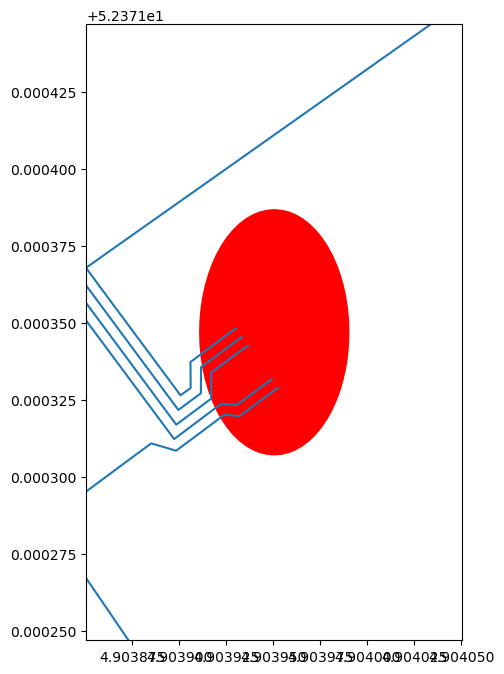

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
extend = .0001
df_lvc.plot(ax=ax)
target_gdp.plot(ax=ax, color='red')
ax.set_xlim(long - extend, long + extend)
ax.set_ylim(lat - extend, lat + extend);

Cable IDs

In [7]:
cable_id_low_to_high = [435322391, 434222837, 434275720, 434150741, 434245324]
cable_id_low_to_high

[435322391, 434222837, 434275720, 434150741, 434245324]

Obtain cable (linestring) boundaries

In [8]:
s = df_lvc.geometry.boundary.apply(lambda x: list(x.geoms)[0])
e = df_lvc.geometry.boundary.apply(lambda x: list(x.geoms)[1])

s_e = np.hstack([s, e])

df_nodes = gpd.GeoDataFrame(geometry=s_e, crs=CRS)

Plot boundaries for analysis

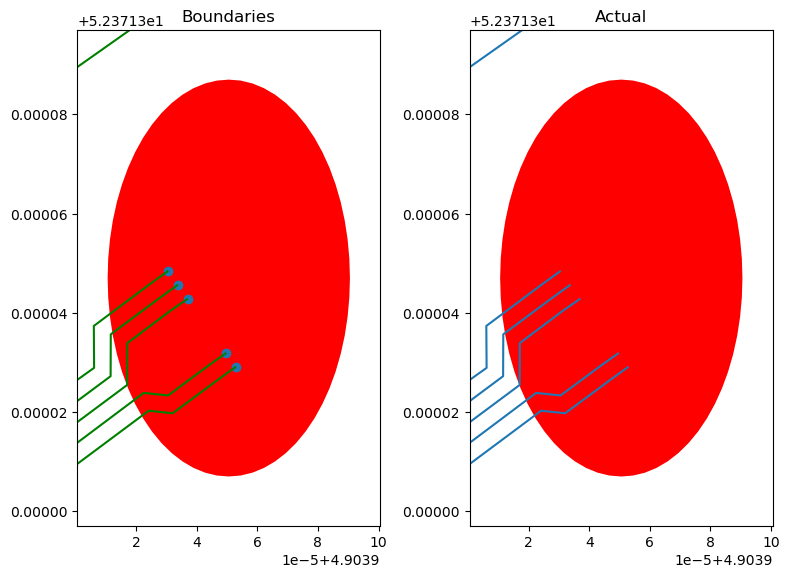

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

extend = .00005
# plot circle
ax[0].set_title('Boundaries')
target_gdp.plot(ax=ax[0], color='red')
# plot node boundaries
df_nodes.plot(ax=ax[0])
# plot cables related to the boundaries
df_lvc[df_lvc.id.isin(cable_id_low_to_high)].plot(ax=ax[0], color='green')
ax[0].set_xlim(long - extend, long + extend)
ax[0].set_ylim(lat - extend, lat + extend)

ax[1].set_title('Actual')
target_gdp.plot(ax=ax[1], color='red')
df_lvc.plot(ax=ax[1])
ax[1].set_xlim(long - extend, long + extend)
ax[1].set_ylim(lat - extend, lat + extend)

fig.tight_layout()

Left: depicts the end or start nodes from a line string that have a overlap with the field within the buffersize. Right: depicts only the line strings

Find boundaries that intersect with the target

In [10]:
dist = df_nodes.distance(target_gdp.iloc[0, 1])
df_nodes[dist == 0]

/var/folders/bh/hhr2wkwn2ldcpz5w4tgn7sb80000gn/T/ipykernel_39103/3551037431.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist = df_nodes.distance(target_gdp.iloc[0, 1])


,geometry
844,POINT (4.90395 52.37133)
867,POINT (4.90393 52.37135)
1751,POINT (4.90395 52.37133)
4031,POINT (4.90393 52.37135)
4159,POINT (4.90394 52.37134)


Intersect boundaries

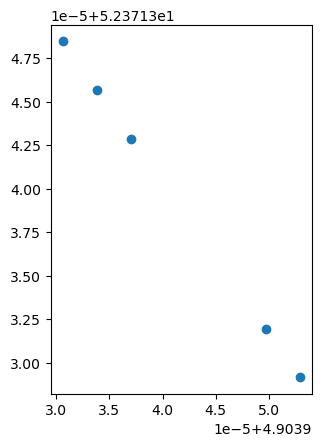

In [11]:
boundaries_intersects = df_nodes.intersects(target_gdp.iloc[0, 1])
df_nodes[boundaries_intersects].plot();

Obtain boundaries on all cables

In [12]:
%%time

def f(cable, s: list, e: list):
    boundaries = list(cable.geoms)

    if len(boundaries) > 0:
        s.append(boundaries[0])
        e.append(boundaries[-1])

start_holder = []
end_holder = []

_ = laagspanningskabel.geometry.boundary.apply(lambda cable: f(cable, start_holder, end_holder))

CPU times: user 22.3 s, sys: 312 ms, total: 22.6 s
Wall time: 22.6 s


Stack all points in 1D and store as Geo

In [15]:
stacked_boundaries = np.hstack([start_holder, end_holder])

df_boundaries = gpd.GeoDataFrame(geometry=stacked_boundaries, crs=CRS)
df_boundaries.head()

,geometry
0,POINT (5.70785 51.95208)
1,POINT (5.70684 51.95345)
2,POINT (5.70719 51.95240)
3,POINT (5.70743 51.95292)
4,POINT (5.70761 51.95377)


# 2. Design algorithm

## 2.1 prepare data

- laagspanningsverdeelkasten
- middenspanningsinstallaties

In [16]:
CRS = 4326

laagspanningsverdeelkasten = gpd.read_parquet('../../data/liander/laagspanningsverdeelkasten.pyarrow')
laagspanningsverdeelkasten = laagspanningsverdeelkasten.to_crs(pyproj.CRS.from_epsg(CRS))
laagspanningsverdeelkasten.head()

,id,geometry
0,764125556,POINT (4.75765 52.38179)
1,765130664,POINT (4.49548 52.14417)
2,765181501,POINT (4.40168 52.14834)
3,765181506,POINT (4.40176 52.14841)
4,765181550,POINT (4.40183 52.14847)


In [17]:
middenspanningsinstallaties = gpd.read_parquet('../../data/liander/middenspanningsinstallaties.pyarrow')
middenspanningsinstallaties = middenspanningsinstallaties.to_crs(pyproj.CRS.from_epsg(CRS))
middenspanningsinstallaties.head()

,id,geometry
0,816065352,POINT (6.48077 51.87102)
1,817834249,POINT (5.98052 51.83813)
2,843702200,POINT (6.02801 51.95570)
3,853890452,POINT (5.97804 52.23576)
4,854598048,POINT (5.45366 52.97253)


In [18]:
middenspanningsinstallaties.shape, laagspanningsverdeelkasten.shape

((32956, 2), (78748, 2))

Separate lon and lat from Point

In [19]:
df_all_low_voltage_boundaries = pd.DataFrame({
    'lon': df_boundaries.geometry.x,
    'lat': df_boundaries.geometry.y
})

df_all_low_voltage_boundaries.head()

,lon,lat
0,5.707849,51.952076
1,5.706844,51.953451
2,5.707193,51.952405
3,5.707426,51.952918
4,5.707608,51.953768


In [20]:
df_all_low_voltage_boundaries.shape, df_boundaries.shape

((1806068, 2), (1806068, 1))

## 2.2 Construct an unsupervised nearest neighbor searcher + density based algorithm

In [53]:
import tqdm
from shapely import LineString
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


def compute_net_reconstructor(target_geo_points: pd.DataFrame | pd.Series, model_searcher: NearestNeighbors, max_dis: float = None):
    """
    Fills the gaps (missing lines) between low voltage geo points and target points

    :param max_dis: max distance between target point and nose or tail of a linestring
    :param model_searcher: NearestNeighbors pretrained model
    :param target_geo_points: e.g. middenspanningsinstallaties.geometry
    :return: reconstructed and not_possible_lines lists
    """

    reconstructed = []
    not_possible_lines = []
    threshold = .000010

    for target_geo in tqdm.tqdm(target_geo_points):
        lon = target_geo.x
        lat = target_geo.y

        neighbors = model_searcher.kneighbors([[lon, lat]])

        if len(neighbors[1][0]) == 0:
            not_possible_lines.append(target_geo)
            continue

        neigh_boundaries = df_boundaries.iloc[neighbors[1][0], -1]
        stacked = [[x, y] for x, y in zip(neigh_boundaries.x, neigh_boundaries.y)]

        # Construct a density based clustering solution
        model_clustering = DBSCAN(eps=.000005, min_samples=1, n_jobs=-1).fit(stacked)

        c = pd.DataFrame({
            'dis': neighbors[0][0],
            'node_id': neighbors[1][0],
            'label': model_clustering.labels_
        })

        c_dis_mu = c.groupby('label')['dis'].mean()
        c_nods = c.groupby('label')['node_id'].apply(list).to_dict()

        nearest_idx = []
        for label, dis in enumerate(c_dis_mu):
            if max_dis is not None and (c_dis_mu[0] > max_dis or dis > max_dis):
                break

            if (dis - c_dis_mu[0]) < threshold:
                nearest_idx = nearest_idx + c_nods[label]

        draw_lines = [LineString([neighbor, target_geo]) for neighbor in list(df_boundaries.iloc[nearest_idx, -1])]
        reconstructed.append(draw_lines)

    return reconstructed, not_possible_lines

In [23]:
%%time

max_dis = .000120
model_neigh_searcher = NearestNeighbors(n_neighbors=20, radius=max_dis, n_jobs=-1).fit(df_all_low_voltage_boundaries.values)

CPU times: user 433 ms, sys: 8.21 ms, total: 441 ms
Wall time: 450 ms


In [34]:
%%time

reconstructed, not_possible_lines = compute_net_reconstructor(middenspanningsinstallaties.geometry, model_neigh_searcher)

100%|██████████| 32956/32956 [02:17<00:00, 239.23it/s]

CPU times: user 1min 53s, sys: 39.1 s, total: 2min 32s
Wall time: 2min 17s


In [54]:
%%time

reconstructed_lsv, not_possible_lines_lsv = compute_net_reconstructor(laagspanningsverdeelkasten.geometry, model_neigh_searcher, .000020)

100%|██████████| 78748/78748 [05:41<00:00, 230.89it/s]

CPU times: user 4min 36s, sys: 1min 41s, total: 6min 17s
Wall time: 5min 41s


In [55]:
all_reconstructed = reconstructed + reconstructed_lsv
len(all_reconstructed)

111704

In [56]:
line_strings = [line for lines in all_reconstructed for line in lines]
len(line_strings)

213910

## 2.3 Save results as reconstructed lines

In [57]:
gpd_reconstructed = gpd.GeoDataFrame({
    'geometry': line_strings
}, crs=CRS)

In [58]:
# Store as geojson
gpd_reconstructed.to_file('reconstructed_lines_msi_lsv.geojson', driver="GeoJSON")

In [59]:
# Store as geodataframe
gpd_reconstructed.to_parquet('reconstructed_lines_msi_lsv.pyarrow')

In [ ]:
# 6.48077 51.87102

# Future work

Instead of obtaining the nose and tail of each linestring (e.g. represented in a path vector), merge the "sub linestrings" in order to have 1 linestring representing a path. After this process step 2 can be repeated.

In [ ]:
# TODO: Run segmented data for clustering solution without using targets